In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import undetected_chromedriver as uc
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [12]:
chrome_options = Options()
chrome_options.add_argument("--headless")  
chrome_options.add_argument("--disable-gpu")
driver = uc.Chrome(headless=False,use_subprocess=False,option=chrome_options)
url=f"https://fbref.com/en/comps/31/shooting/Liga-MX-Stats"
driver.get(url)
wait = WebDriverWait(driver, 10)  # waiting max 10sec, can be adjusted
table = wait.until(EC.visibility_of_element_located((By.ID, f"div_stats_shooting")))
html_table = table.get_attribute('outerHTML')
info = pd.read_html(html_table)[0]

C:\Users\AlonsoCarmona\AppData\Local\Temp\ipykernel_14332\3683991927.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  info = pd.read_html(html_table)[0]


In [13]:
info.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1        José Abella             mx MEX                 DF   
1                  2     Carlos Acevedo             mx MEX                 GK   
2                  3      Alonso Aceves             mx MEX                 DF   
3                  4   Sebastián Aceves             mx MEX              DF,FW   
4                  5     Eduardo Águila             mx MEX                 DF   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
               Squad                Age               Born                90s   
0             Santos             31-274               1994               14.9   
1             Santos             29-206               1996               17.0   
2            Pachuca             24-228               2001               14.3   
3             Toluca             19-326               2005                1.5   
4           Atlético             23-178               2002               14.9   

  Standard      ...                   Expected                             \
       Gls  Sh  ...  Dist FK PK PKatt       xG npxG npxG/Sh  G-xG np:G-xG   
0        0   7  ...  27.9  6  0     0      0.4  0.4    0.05  -0.4    -0.4   
1        0   1  ...  67.5  1  0     0      0.0  0.0    0.02   0.0     0.0   
2        1  20  ...  21.6  0  0     0      1.4  1.4    0.07  -0.4    -0.4   
3        0   0  ...   NaN  0  0     0      0.0  0.0     NaN   0.0     0.0   
4        1  10  ...  16.7  0  0     0      0.7  0.7    0.07  +0.3    +0.3   

  Unnamed: 25_level_0  
              Matches  
0             Matches  
1             Matches  
2             Matches  
3             Matches  
4             Matches  

[5 rows x 26 columns]

In [14]:
info.columns=info.columns.droplevel(level=0)
info

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,José Abella,mx MEX,DF,Santos,31-274,1994,14.9,0,7,...,27.9,6,0,0,0.4,0.4,0.05,-0.4,-0.4,Matches
1,2,Carlos Acevedo,mx MEX,GK,Santos,29-206,1996,17.0,0,1,...,67.5,1,0,0,0.0,0.0,0.02,0.0,0.0,Matches
2,3,Alonso Aceves,mx MEX,DF,Pachuca,24-228,2001,14.3,1,20,...,21.6,0,0,0,1.4,1.4,0.07,-0.4,-0.4,Matches
3,4,Sebastián Aceves,mx MEX,"DF,FW",Toluca,19-326,2005,1.5,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
4,5,Eduardo Águila,mx MEX,DF,Atlético,23-178,2002,14.9,1,10,...,16.7,0,0,0,0.7,0.7,0.07,+0.3,+0.3,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,466,Mauro Zaleta,mx MEX,"DF,MF",Mazatlán,23-223,2002,6.1,1,5,...,20.8,0,0,0,0.2,0.2,0.05,+0.8,+0.8,Matches
484,467,Ángel Zapata,mx MEX,MF,Querétaro,24-281,2001,13.9,0,12,...,30.1,1,0,0,0.3,0.3,0.02,-0.3,-0.3,Matches
485,468,Alejandro Zendejas,us USA,"FW,MF",América,27-277,1998,11.1,5,31,...,18.4,3,1,1,4.2,3.5,0.11,+0.8,+0.5,Matches
486,469,José Zúñiga,co COL,FW,América,31-121,1994,6.2,2,9,...,10.1,0,0,0,1.6,1.6,0.18,+0.4,+0.4,Matches


In [15]:
info.Player.unique()

array(['José Abella', 'Carlos Acevedo', 'Alonso Aceves',
       'Sebastián Aceves', 'Eduardo Águila', 'Daniel Aguirre',
       'Eduardo Aguirre', 'Érick Aguirre', 'Gaddi Aguirre',
       'Rodrigo Aguirre', 'Jorge Agustín Rodríguez',
       'Jesús Alberto Angulo', 'Jesús Alcantar', 'Alexandre Alemão',
       'Luis Alfonso Rodríguez', 'Guillermo Allison', 'Facundo Almada',
       'Alfonso Alvarado', 'Roberto Alvarado', 'Alek Álvarez',
       'Efrain Alvarez', 'Kevin Álvarez', 'Fidel Ambríz', 'Bruno Amione',
       'Player', 'Alejandro Andrade', 'Luis Ángel Malagón',
       'Álvaro Angulo', 'Jesús Angulo', 'José Antonio Rodríguez',
       'Uriel Antuna', 'Javier Aquino', 'Ángelo Araos',
       'Fernando Arce Jr.', 'Ramiro Árciga', 'Daniel Arcila',
       'Jesús Arellano', 'Eduardo Armenta', 'José Arroyo',
       'Gerardo Arteaga', 'Víctor Arteaga', 'Ali Ávila', 'Ettson Ayon',
       'Angel Azuaje', 'Tomás Badaloni', 'Kevin Balanta',
       'Carlos Baltazar', 'Robson Bambu', 'Fidel Barajas

In [17]:
df = info[(info['Player']=='Armando González') 	| (info['Player']=='Ricardo Marín')].reset_index()
df

,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,199,193,Armando González,mx MEX,FW,Guadalajara,22-205,2003,12.5,12,...,12.1,0,1,1,11.4,10.6,0.22,+0.6,+0.4,Matches
1,289,279,Ricardo Marín,mx MEX,FW,Puebla,27-238,1998,9.6,4,...,15.3,0,0,0,2.3,2.3,0.14,+1.7,+1.7,Matches


In [19]:
df = df.drop(['index','Rk','Nation','Pos','Squad','Age','Born','90s','FK','PK','PKatt','Matches'],axis=1)
df

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Armando González,12,47,18,38.3,3.76,1.44,0.23,0.61,12.1,11.4,10.6,0.22,+0.6,+0.4
1,Ricardo Marín,4,16,7,43.8,1.67,0.73,0.25,0.57,15.3,2.3,2.3,0.14,+1.7,+1.7


In [20]:
params = list(df.columns)
params = params[1:]
params

['Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'np:G-xG']

In [42]:
ranges=[]
a_values=[]
b_values=[]

for x in params:
    a=min(df[params][x])
    a = float(a)
    a= a-(a/4)

    b=max(df[params][x])
    b = float(b)
    b= b+(b/4)

    ranges.append((a,b))

for x in range(len(df['Player'])):
    if df['Player'][x] == 'Armando González':
        a_values=df.iloc[x].values.tolist()
    if df['Player'][x] == 'Ricardo Marín':
        b_values=df.iloc[x].values.tolist()

a_values = a_values[1:]
b_values = b_values[1:]
a_values = [float(item) for item in a_values]
b_values = [float(item) for item in b_values]

values = [a_values,b_values]

In [40]:
values

[['12',
  '47',
  '18',
  '38.3',
  '3.76',
  '1.44',
  '0.23',
  '0.61',
  '12.1',
  '11.4',
  '10.6',
  '0.22',
  '+0.6',
  '+0.4'],
 ['4',
  '16',
  '7',
  '43.8',
  '1.67',
  '0.73',
  '0.25',
  '0.57',
  '15.3',
  '2.3',
  '2.3',
  '0.14',
  '+1.7',
  '+1.7']]

In [ ]:
title = dict (
    title_name= 'Armando Gonzalez',
    title_color = '#ca222f',
    subtitle_name= 'Guadalajara',
    subtitle_color='#ca222f',
    title_name_2= 'Ricardo Marin',
    title_color_2 = 'blue',
    subtitle_name_2= 'Puebla',
    subtitle_color_2= 'blue',
    title_fontsize=18,
    subtitle_fontsize=15

)


In [36]:
ranges

[(9.0, 5.0),
 (12.0, 58.75),
 (13.5, 8.75),
 (28.724999999999998, 54.75),
 (1.2525, 4.699999999999999),
 (0.5475, 1.7999999999999998),
 (0.17250000000000001, 0.3125),
 (0.4275, 0.7625),
 (9.075, 19.125),
 (8.55, 2.875),
 (7.949999999999999, 2.875),
 (0.10500000000000001, 0.275),
 (0.44999999999999996, 2.125),
 (0.30000000000000004, 2.125)]

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

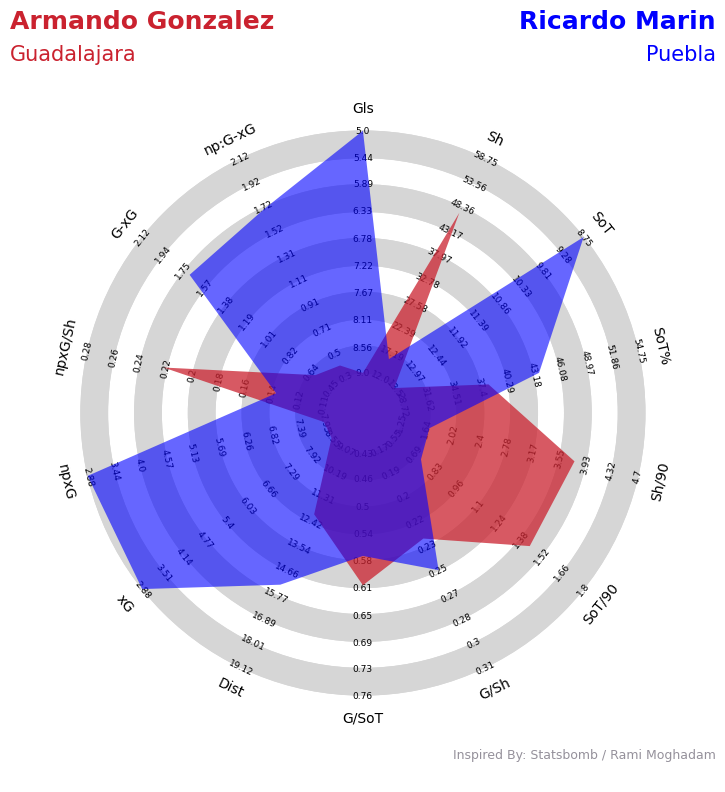

In [43]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges, 
                          params=params, 
                          values=values,
                          radar_color=['#ca222f','blue'],
                          alphas=[.75,.6],
                          title=title,
                          compare=True)